In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(20)
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.utils import to_categorical
from keras.layers import Dropout

Using TensorFlow backend.
/home/user/myenv2/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_csv = pd.read_csv('/home/user/Documents/NN_week1/CNAE-9.data',header=None)

In [3]:
y,x = data_csv.iloc[:,0],data_csv.iloc[:,1:]
x = np.array(x.astype('float32'))

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)
z = y_test
y_test = to_categorical(y_test,num_classes=10)
y_train = to_categorical(y_train,num_classes=10)

In [5]:
nb_class = 10
batch_size = 36
n_epoch = 20

In [6]:
def train_model(n):
    model = Sequential()
    model.add(Dense(512,input_shape=(856,),activation='relu'))
    model.add(Dropout(0.2))
    for i in range(0,n-1):
        model.add(Dense(64,activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(10,activation='softmax'))
    model.summary()
    return model

In [7]:
n=input("enter number of hidden layers : ")
model  = train_model(int(n))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

enter number of hidden layers : 4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               438784    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)   

In [8]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose=2,validation_split=0.2)

Train on 518 samples, validate on 130 samples
Epoch 1/20
0s - loss: 2.1565 - acc: 0.2066 - val_loss: 1.8977 - val_acc: 0.5615
Epoch 2/20
0s - loss: 1.6658 - acc: 0.4826 - val_loss: 1.3056 - val_acc: 0.7077
Epoch 3/20
0s - loss: 1.1232 - acc: 0.7085 - val_loss: 0.7386 - val_acc: 0.9000
Epoch 4/20
0s - loss: 0.7464 - acc: 0.8185 - val_loss: 0.4577 - val_acc: 0.9077
Epoch 5/20
0s - loss: 0.4546 - acc: 0.8822 - val_loss: 0.3592 - val_acc: 0.8923
Epoch 6/20
0s - loss: 0.2973 - acc: 0.9266 - val_loss: 0.2839 - val_acc: 0.9077
Epoch 7/20
0s - loss: 0.1902 - acc: 0.9575 - val_loss: 0.2170 - val_acc: 0.9231
Epoch 8/20
0s - loss: 0.1593 - acc: 0.9614 - val_loss: 0.2538 - val_acc: 0.9077
Epoch 9/20
0s - loss: 0.0912 - acc: 0.9903 - val_loss: 0.2209 - val_acc: 0.9231
Epoch 10/20
0s - loss: 0.0691 - acc: 0.9865 - val_loss: 0.2307 - val_acc: 0.9385
Epoch 11/20
0s - loss: 0.0589 - acc: 0.9846 - val_loss: 0.2314 - val_acc: 0.9308
Epoch 12/20
0s - loss: 0.0485 - acc: 0.9903 - val_loss: 0.2268 - val_acc

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test,batch_size=2,verbose=0)
print("test loss : ",test_loss)
print("test accuracy : ",test_acc)

test loss :  0.356111455195
test accuracy :  0.9375


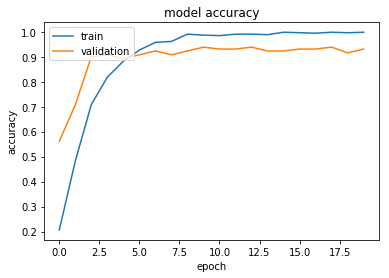

In [10]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

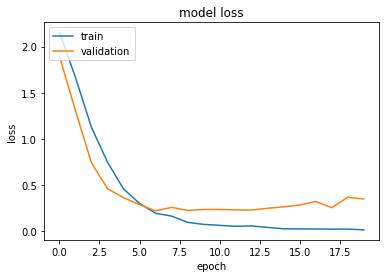

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis
plt.show()